# 3. Modelo de Regresión Logística (Clasificación)

In [97]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [98]:
df = pd.read_csv("Heart_limpio.csv")
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40.0,1.0,3.0,140.0,289.0,0.0,1.0,172.0,0.0,0.0,2.0,0.0
1,49.0,0.0,1.0,160.0,180.0,0.0,1.0,156.0,0.0,1.0,1.0,1.0
2,37.0,1.0,3.0,130.0,283.0,0.0,2.0,98.0,0.0,0.0,2.0,0.0
3,48.0,0.0,2.0,138.0,214.0,0.0,1.0,108.0,1.0,1.5,1.0,1.0
4,54.0,1.0,1.0,150.0,195.0,0.0,1.0,122.0,0.0,0.0,2.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45.0,1.0,4.0,110.0,264.0,0.0,1.0,132.0,0.0,1.2,1.0,1.0
914,68.0,1.0,2.0,144.0,193.0,1.0,1.0,141.0,0.0,3.4,1.0,1.0
915,57.0,1.0,2.0,130.0,131.0,0.0,1.0,115.0,1.0,1.2,1.0,1.0
916,57.0,0.0,3.0,130.0,236.0,0.0,3.0,174.0,0.0,0.0,1.0,1.0


# Separamos la variable target

In [99]:
df.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [100]:
X = df[['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope']]

y = df["HeartDisease"]


# Creamos nuestro modelo

In [101]:
from sklearn.linear_model import LogisticRegression

In [102]:
model = LogisticRegression(random_state=20)
model.fit(X, y);

C:\Users\Señor Topo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [103]:
predictions = model.predict(X)

In [104]:
predicions_proba = model.predict_proba(X)

In [105]:
model.score(X, y)

0.8474945533769063

In [106]:
from sklearn import model_selection

In [107]:
validation_size = 0.20
seed = 7
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X,
                                                                    y,
                                                                    test_size=validation_size,
                                                                    random_state=seed)

In [108]:
model = LogisticRegression(penalty = "l2", C = 1291.5496650148827)
model.fit(X_train, Y_train)

C:\Users\Señor Topo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=1291.5496650148827)

In [109]:
predictions = model.predict(X_test)

In [110]:
from sklearn.metrics import accuracy_score

In [111]:
acierto = accuracy_score(Y_test, predictions)

error = 1 - acierto
print("Acierto:", round(acierto*100, 2), "%")
print("Error:", round(error*100, 2), "%")

Acierto: 84.78 %
Error: 15.22 %


In [112]:
print("El modelo tiene un porcentaje de acierto del",model.score(X_test, Y_test)*100,"%")


El modelo tiene un porcentaje de acierto del 84.78260869565217 %


### Quitamos las variables que puedan estar metiendo ruido, para ello nos basamos en la importancia de las variables.

In [113]:
feature_importance = abs(model.coef_[0])
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5

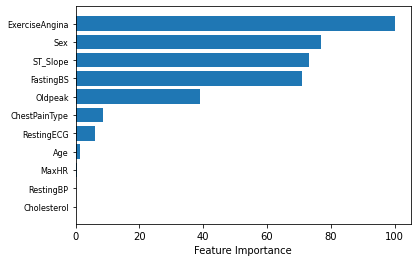

In [114]:
featfig = plt.figure()
featax = featfig.add_subplot(1, 1, 1)
featax.barh(pos, feature_importance[sorted_idx], align='center')
featax.set_yticks(pos)
featax.set_yticklabels(np.array(X.columns)[sorted_idx], fontsize=8)
featax.set_xlabel('Feature Importance')

plt.show()

# Creamos de nuevo el modelo

In [115]:
df.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [116]:
X = df[['ExerciseAngina', 'Sex', 'ST_Slope', 'Oldpeak']]

y = df["HeartDisease"]

In [117]:
modelo_2 = LogisticRegression()

modelo_2.fit(X, y)

LogisticRegression()

In [118]:
predictions = modelo_2.predict(X)

In [119]:
predicions_proba = modelo_2.predict_proba(X)
print(np.round(np.array(predicions_proba), 2))

[[0.76 0.24]
 [0.65 0.35]
 [0.76 0.24]
 ...
 [0.06 0.94]
 [0.79 0.21]
 [0.76 0.24]]


In [120]:
modelo_2.score(X, y)

0.8366013071895425

In [121]:
validation_size = 0.3
seed = 7
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X,
                                                                    y,
                                                                    test_size=validation_size,
                                                                    random_state=seed)

In [122]:
modelo_2 = LogisticRegression()
modelo_2.fit(X_train, Y_train)

LogisticRegression()

In [123]:
predictions = modelo_2.predict(X_test)

In [124]:
acierto = accuracy_score(Y_test, predictions)

error = 1 - acierto
print("Acierto:", round(acierto*100, 2), "%")
print("Error:", round(error*100, 2), "%")

Acierto: 84.42 %
Error: 15.58 %


<h2>

* El modelo 1 tiene un accuracy del 84,74 %

* El modelo 2 tiene un accuracy del 84,42 %
